Import libraries

In [42]:
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
train_data = pd.read_csv('./data/train.csv')

In [44]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Fill missing data

In [45]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [46]:
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])

Encode categorical vars

In [47]:
train_data['Sex'] = train_data['Sex'].map({ 'male': 0, 'female': 1 })
train_data = pd.get_dummies(train_data, columns=['Embarked'], drop_first=True) # One-hot encoding

Select features for clustering

In [48]:
selected_features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']
selected_features_data = train_data[selected_features]

K-Means

In [50]:
def cluster_kmeans(data, clusters_amount):
    cluster_argorithm = KMeans(n_clusters=clusters_amount, n_init=10, random_state=42)
    cluster_argorithm.fit(data)
    cluster_labels = cluster_argorithm.labels_
    silh_score = silhouette_score(data, cluster_labels, metric='euclidean')
    return cluster_labels, silh_score

In [52]:
pca = PCA(n_components=2)
train_pca = pca.fit_transform(selected_features_data)

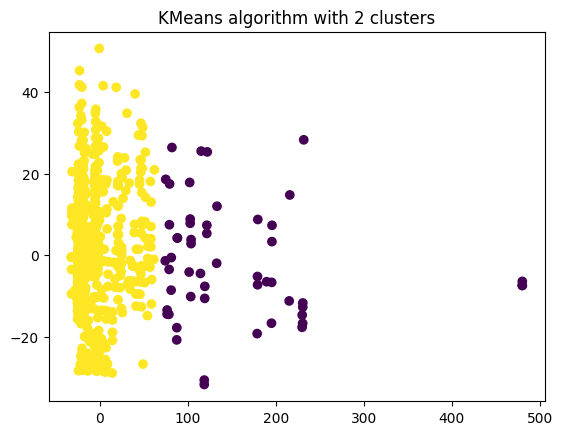

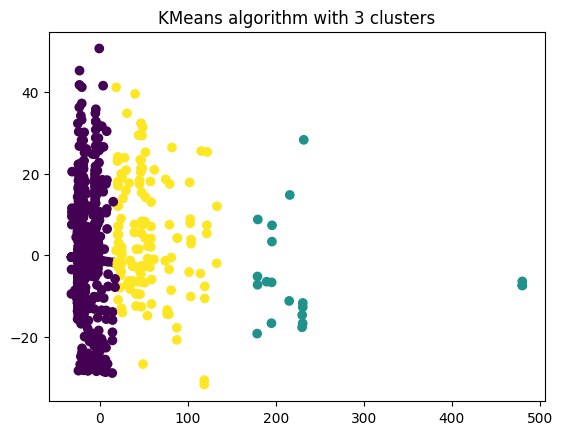

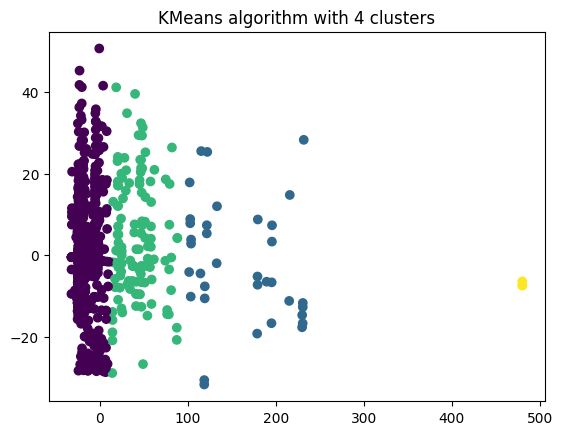

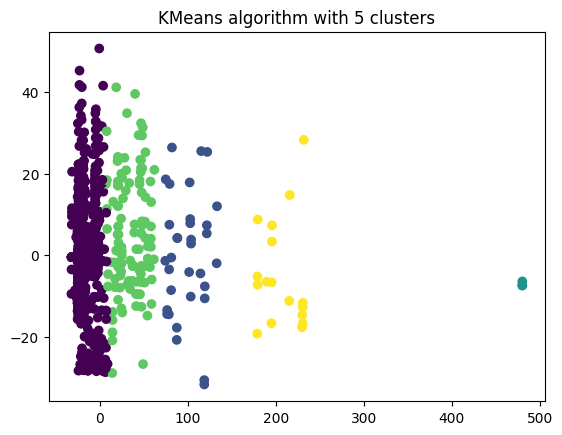

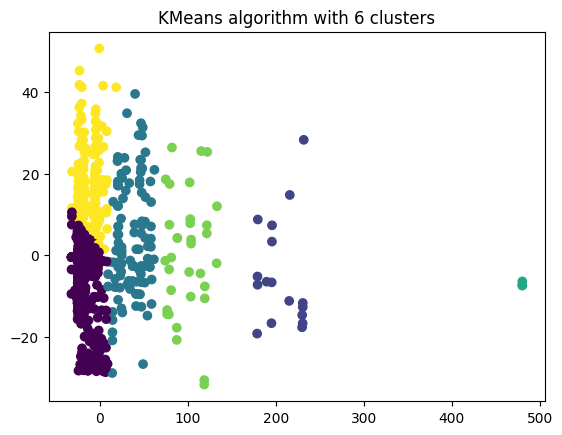

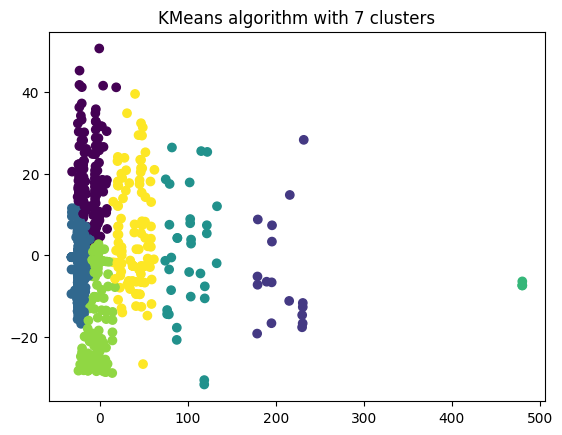

In [55]:
silh_scores = []

for i in range(2, 8):
    kmeans_labels, silh_score = cluster_kmeans(selected_features_data, i)
    silh_scores.append(silh_score)
    plt.scatter(train_pca[:, 0], train_pca[:, 1], c=kmeans_labels)
    plt.title(f"KMeans algorithm with {i} clusters")
    plt.show()

In [56]:
for clusters_amount, silh_score in zip(range(2, 8), silh_scores):
    print(f"Silhouette score for {clusters_amount} clusters: {silh_score:.5f}")

Silhouette score for 2 clusters: 0.79150
Silhouette score for 3 clusters: 0.66245
Silhouette score for 4 clusters: 0.63613
Silhouette score for 5 clusters: 0.61549
Silhouette score for 6 clusters: 0.45025
Silhouette score for 7 clusters: 0.48066


Найкращі результати вийшли для двох кластерів

DBSCAN clustering

In [57]:
def cluster_dbscan(data, eps):
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    cluster_algorithm = DBSCAN(eps=eps, min_samples=5)
    cluster_labels = cluster_algorithm.fit_predict(data_scaled)
    silh_score = silhouette_score(data_scaled, cluster_labels)
    return cluster_labels, silh_score

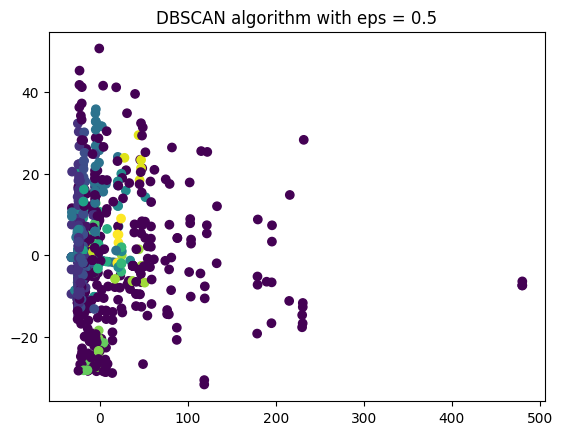

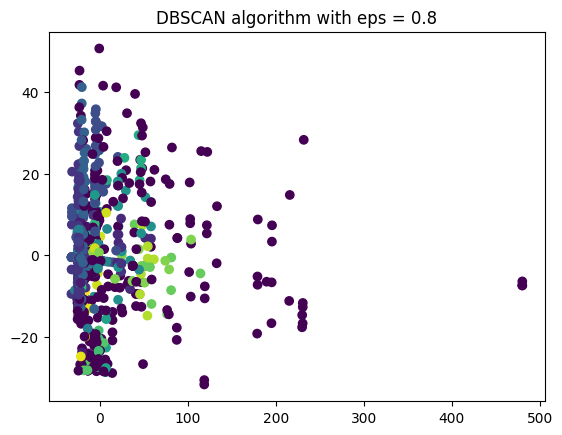

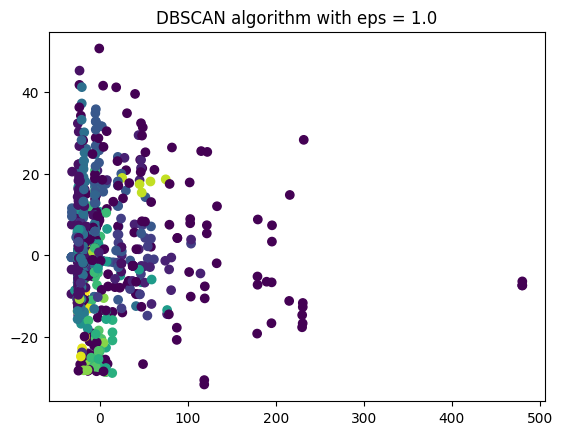

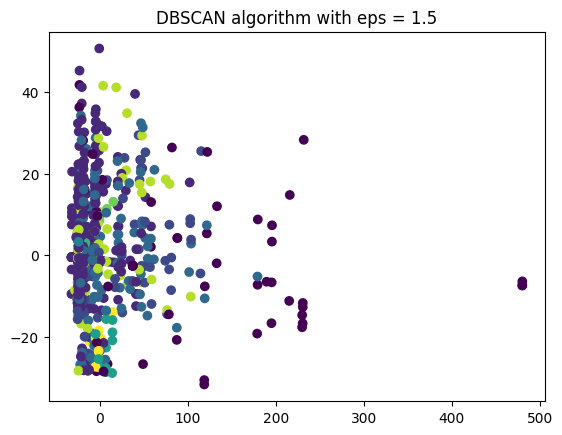

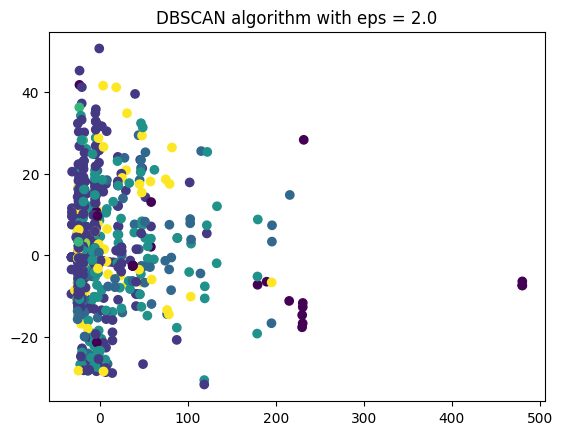

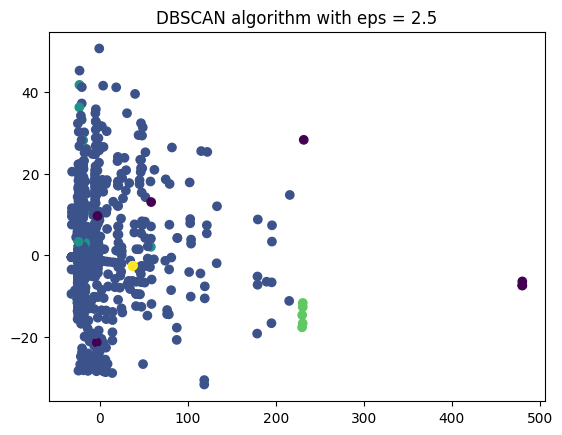

In [59]:
epses = [0.5, 0.8, 1.0, 1.5, 2.0, 2.5]
silh_scores = []

for eps in epses:
    dbscan_labels, silh_score = cluster_dbscan(selected_features_data, eps)
    silh_scores.append(silh_score)
    plt.scatter(train_pca[:, 0], train_pca[:, 1], c=dbscan_labels)
    plt.title(f"DBSCAN algorithm with eps = {eps}")
    plt.show()

In [60]:
for clusters_amount, silh_score in zip(range(2, 8), silh_scores):
    print(f"Silhouette score for {clusters_amount} clusters: {silh_score:.5f}")

Silhouette score for 2 clusters: 0.10238
Silhouette score for 3 clusters: 0.15278
Silhouette score for 4 clusters: 0.25354
Silhouette score for 5 clusters: 0.32073
Silhouette score for 6 clusters: 0.30373
Silhouette score for 7 clusters: 0.35706


Результати вийшли не дуже хороші, тож цей алгоритм нам не підходить

Agglomerative algorithm

In [61]:
def cluster_agglomerative(data, clusters_amount):
    cluster_algorithm = AgglomerativeClustering(n_clusters=clusters_amount)
    cluster_algorithm.fit(data)
    cluster_labels = cluster_algorithm.labels_
    silh_score = silhouette_score(data, cluster_labels, metric='euclidean')
    return cluster_labels, silh_score

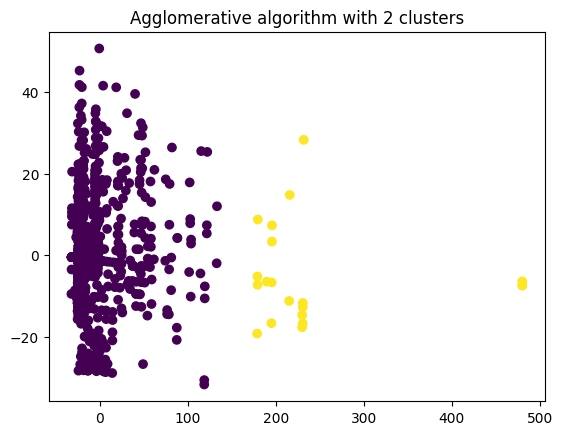

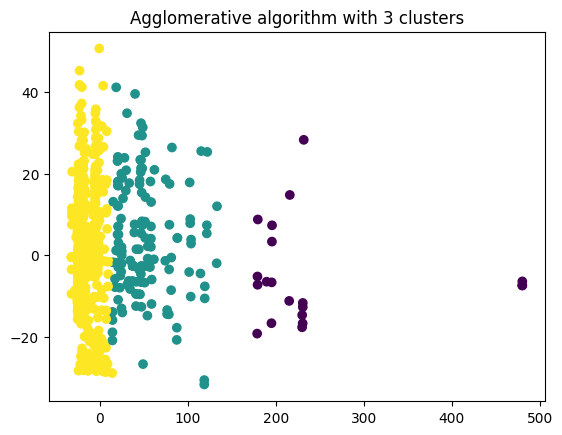

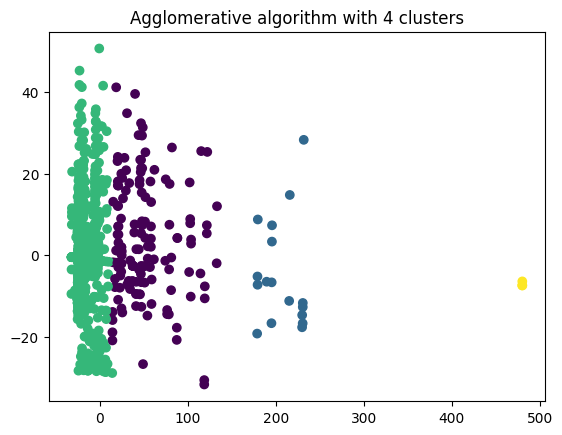

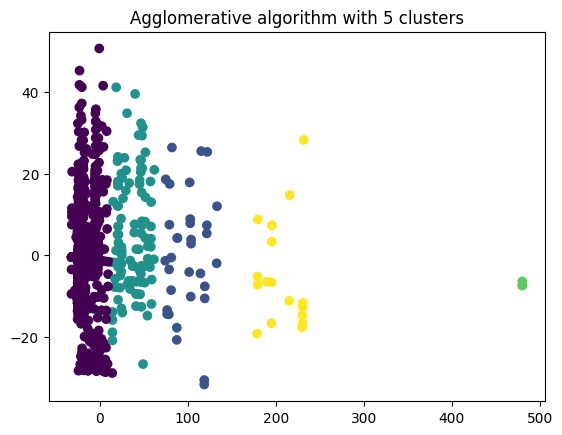

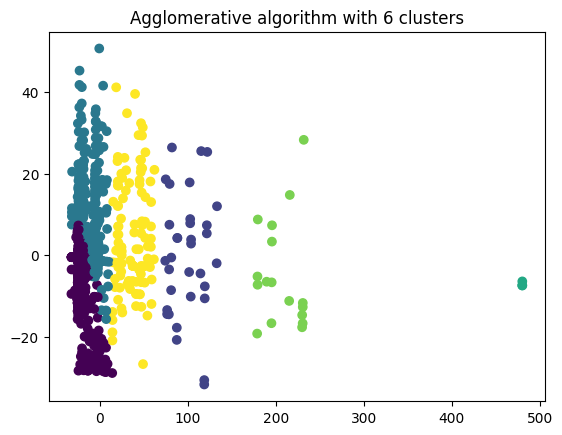

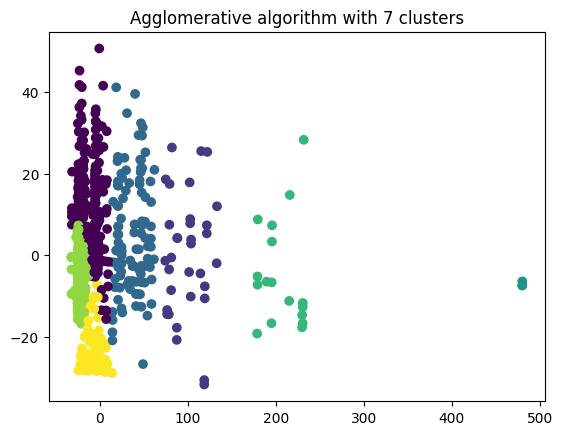

In [63]:
silh_scores = []

for i in range(2, 8):
    kmeans_labels, silh_score = cluster_agglomerative(selected_features_data, i)
    silh_scores.append(silh_score)
    plt.scatter(train_pca[:, 0], train_pca[:, 1], c=kmeans_labels)
    plt.title(f"Agglomerative algorithm with {i} clusters")
    plt.show()

In [64]:
for clusters_amount, silh_score in zip(range(2, 8), silh_scores):
    print(f"Silhouette score for {clusters_amount} clusters: {silh_score:.5f}")

Silhouette score for 2 clusters: 0.84672
Silhouette score for 3 clusters: 0.65714
Silhouette score for 4 clusters: 0.65972
Silhouette score for 5 clusters: 0.62214
Silhouette score for 6 clusters: 0.41300
Silhouette score for 7 clusters: 0.44538


Найкращий результат вийшов для 2 кластерів

Clustering test data

In [69]:
test_data = pd.read_csv('./data/test.csv')

In [70]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [71]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [73]:
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].median())

test_data['Sex'] = test_data['Sex'].map({ 'male': 0, 'female': 1 })
test_data = pd.get_dummies(test_data, columns=['Embarked'], drop_first=True) # One-hot encoding

In [74]:
selected_features_test_data = test_data[selected_features]

In [75]:
def plot_clusters(data, labels, clusters_amount, name):
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', alpha=0.5)
    plt.title(f"{name} algorithm with {clusters_amount} clusters")
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.grid(True)
    plt.show()

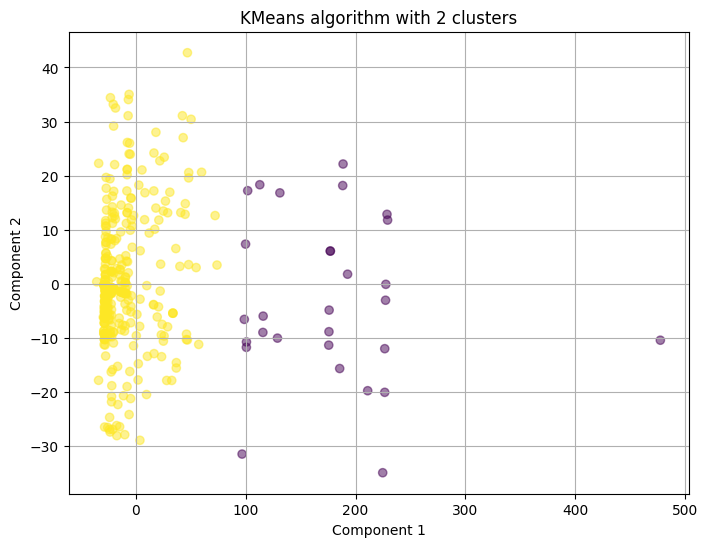

Silhouette score: 0.8271651480581689


In [77]:
test_pca = pca.fit_transform(selected_features_test_data)

clusters_amount = 2
kmeans_labels_test, silh_score = cluster_kmeans(selected_features_test_data, clusters_amount)
plot_clusters(test_pca, kmeans_labels_test, clusters_amount, "KMeans")
print(f"Silhouette score: {silh_score}")

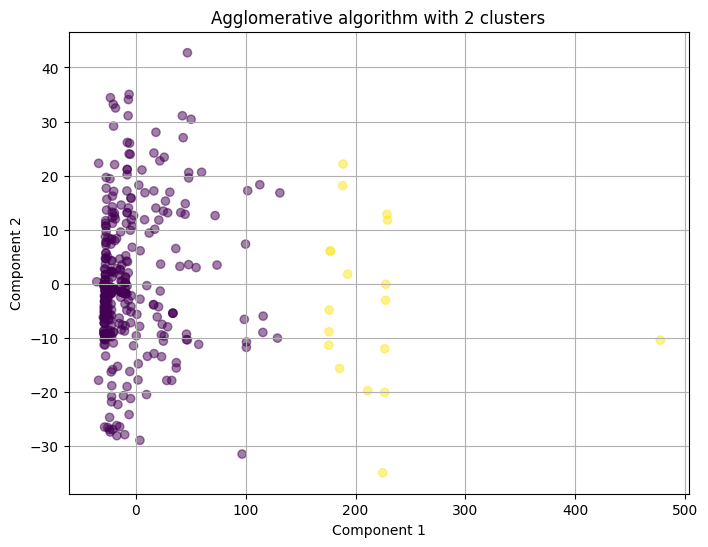

Silhouette score: 0.8356775478149681


In [78]:
agglomerative_labels_test, silh_score = cluster_agglomerative(selected_features_test_data, clusters_amount)
plot_clusters(test_pca, agglomerative_labels_test, clusters_amount, "Agglomerative")
print(f"Silhouette score: {silh_score}")